# Decision Trees

    A decision tree is a nonlinear model, in contrast to linear models.
    The methods that are used to identify and characterize nonlinear models are bundled under the term
    'generalized additive models'.
    
    In the regression setting, a generalized additive model has the form:
    
    E(Y |X1, X2, . . . , Xp) = α + f1(X1) + f2(X2) + · · · + fp(Xp)
    
    Where X represent the predictors and Y the outcome; the fj ’s are unspecified smooth (“nonparametric”) 
    functions.
    For nonlinear models each function is fit using a scatterplot smoother (e.g., a cubic smoothing spline or kernel smoother), and provide an algorithm for simultaneously estimating all p functions. 
    For example, an additive (logistic) regression model replaces each linear term by a more general
    functional form.
    The functions fj are estimated in a flexible manner, using an algorithm whose basic building block is a
    scatterplot smoother. The estimated function fˆ can then reveal possible nonlinearities in the effect of X.
    Not all of the functions fj need to be nonlinear. An additive model can easily mix in linear and other
    parametric forms with the nonlinear terms, a necessity when some of the inputs are qualitative variables.
    
    Decision Trees can be divided into classification trees and regression trees or a combination of both which is
    called a CART model. 
    For an example of a decisiont tree see below figure.

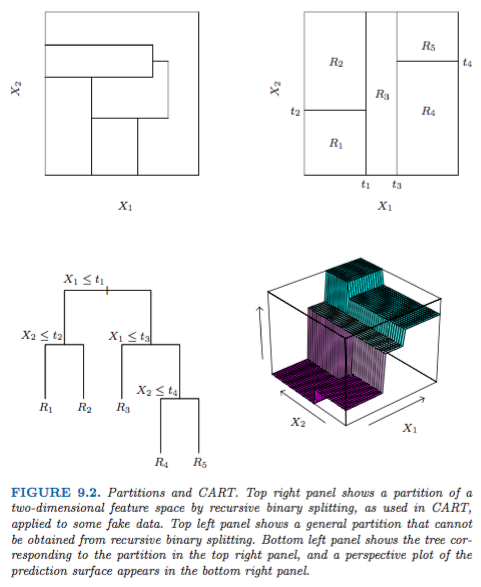

In [1]:
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/decision-tree.png')

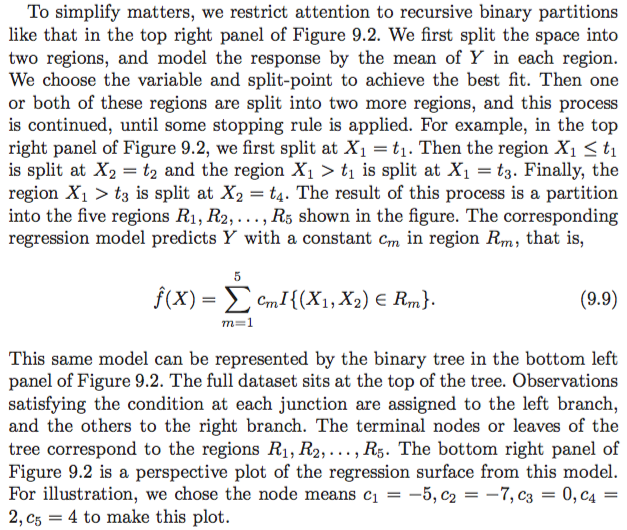

In [3]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/decision-tree-description.png')

# Regression Tree
    How to grow a regression tree

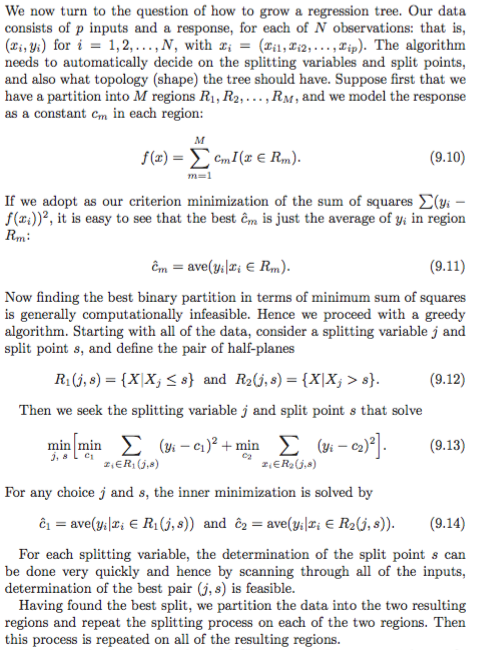

In [4]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/regression-tree-1.png')

    How large should we grow the tree?
    The tree size of a tree is a tuning parameter that governs the model's complexity.
    A very large tree might overfit the data, while a small tree might not capture the important structure.

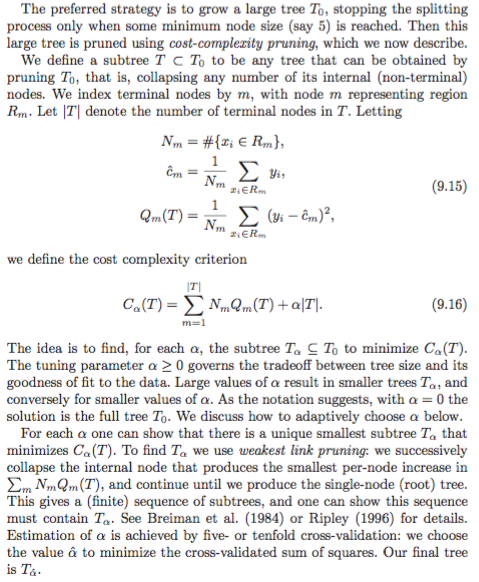

In [5]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/regression-tree-2.png')

# Classification Tree
    Pruning a classification tree is different from a regression tree and requires different methods for determining the splits of the tree.

    Example of a decision tree with the entropy measurement.
    
    How much information the tree should capture defines the complexity of the tree. 
    The entropy can be interpreted as the uncertainty associated with data and 'how much information' the data
    captures.
    
    Example:
    Imagine that we have a set S of data, each member of which is labeled as belonging to one of a finite number of classes C1, Cn.
    If all the data points belong to a single class, then there is no real uncertainty, which means we'd like there to be low entropy.
    If the data points are evenly spread across the classes, there is a lot of uncertatinty and we'd like there to
    be high entropy.
    
    In the below formulas, Pmk is the proportion of data labeled as class Ci.

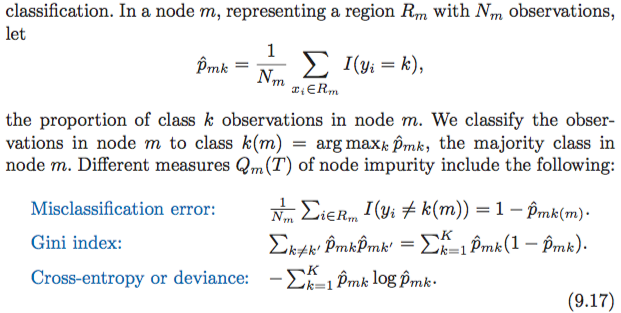

In [7]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/classification-tree-1.png')

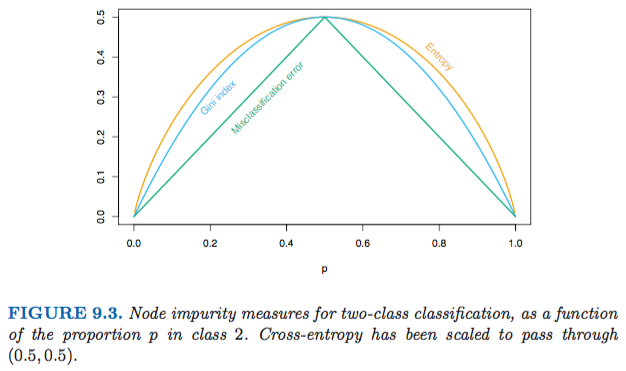

In [8]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/classification-tree-2.png')

In [3]:
# compute the entropy of a single set of labeled data

from __future__ import division
from collections import Counter, defaultdict
from functools import partial
import math, random

def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count
            for count in Counter(labels).values()]

def data_entropy(labeled_data):        
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

    If we parition our data S into subsets S1, Sm, containing proportions Q1, Qm of the dta, then we compute the
    entropy of the partition as a weighted sum:

In [4]:
def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)
    
    return sum( data_entropy(subset) * len(subset) / total_count
                for subset in subsets )

# Creating a decision classification tree

In [5]:
def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item 
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups

In [6]:
# find the partition with the least entropy

def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
    return group_by(inputs, lambda x: x[0][attribute])    

def partition_entropy_by(inputs,attribute):
    """computes the entropy corresponding to the given partition"""        
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values()) 

In [7]:
# Example

inputs = [
    ({'level':'Senior','lang':'Java','tweets':'no','phd':'no'},   False),
    ({'level':'Senior','lang':'Java','tweets':'no','phd':'yes'},  False),
    ({'level':'Mid','lang':'Python','tweets':'no','phd':'no'},     True),
    ({'level':'Junior','lang':'Python','tweets':'no','phd':'no'},  True),
    ({'level':'Junior','lang':'R','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'R','tweets':'yes','phd':'yes'},    False),
    ({'level':'Mid','lang':'R','tweets':'yes','phd':'yes'},        True),
    ({'level':'Senior','lang':'Python','tweets':'no','phd':'no'}, False),
    ({'level':'Senior','lang':'R','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'Python','tweets':'yes','phd':'no'}, True),
    ({'level':'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
    ({'level':'Mid','lang':'Python','tweets':'no','phd':'yes'},    True),
    ({'level':'Mid','lang':'Java','tweets':'yes','phd':'no'},      True),
    ({'level':'Junior','lang':'Python','tweets':'no','phd':'yes'},False)
]

In [8]:
# find the minimum-entropy partition for the whole data set
for key in ['level','lang','tweets','phd']:
    print key, partition_entropy_by(inputs, key)
print

level 0.693536138896
lang 0.860131712855
tweets 0.788450457308
phd 0.892158928262



    Notes:
        The lowest entropy comes from splitting on 'level',
        so we'll need to make a subtree for each possible value of 'level'.
        
        Every 'Mid' candidate is labeled True, which means that the 'Mid' subtree is simply a leaf node 
        predicting True.
        For 'Senior' candidates, we have a mix of Trues and Falses, so we need to split again:

In [9]:
senior_inputs = [(input, label)
                 for input, label in inputs if input["level"] == "Senior"]

for key in ['lang', 'tweets', 'phd']:
    print key, partition_entropy_by(senior_inputs, key)
print

lang 0.4
tweets 0.0
phd 0.950977500433



    The lowest entropy now comes from splitting on 'tweets'. This will be the next attribute to split on.
    Since the entropy is 0, the outcome is either True or False for this split. 
    For these Senior-level candidates, 'yes' tweets always result in True while 'no' tweets always result in False.

In [10]:
# same for junior-level candidates
junior_inputs = [(input, label)
                 for input, label in inputs if input["level"] == "Junior"]

for key in ['lang', 'tweets', 'phd']:
    print key, partition_entropy_by(senior_inputs, key)
print

lang 0.4
tweets 0.0
phd 0.950977500433



# Putting it all together

In [11]:
def classify(tree, input):
    """classify the input using the given decision tree"""
    
    # if this is a leaf node, return its value
    if tree in [True, False]:
        return tree
   
    # otherwise find the correct subtree
    attribute, subtree_dict = tree
    
    subtree_key = input.get(attribute)  # None if input is missing attribute

    if subtree_key not in subtree_dict: # if no subtree for key,
        subtree_key = None              # we'll use the None subtree
    
    subtree = subtree_dict[subtree_key] # choose the appropriate subtree
    return classify(subtree, input)     # and use it to classify the input

In [20]:
# build the representation from the training data
def build_tree_id3(inputs, split_candidates=None):

    # if this is our first pass, 
    # all keys of the first input are split candidates
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()

    # count Trues and Falses in the inputs
    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues
    
    if num_trues == 0:                  # if only Falses are left
        return False                    # return a "False" leaf
        
    if num_falses == 0:                 # if only Trues are left
        return True                     # return a "True" leaf

    if not split_candidates:            # if no split candidates left
        return num_trues >= num_falses  # return the majority leaf
                            
    # otherwise, split on the best attribute
    best_attribute = min(split_candidates,
        key=partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates 
                      if a != best_attribute]
    
    # recursively build the subtrees
    subtrees = { attribute : build_tree_id3(subset, new_candidates)
                 for attribute, subset in partitions.iteritems() }

    subtrees[None] = num_trues > num_falses # default case

    return (best_attribute, subtrees)

In [21]:
# test the model
print "building the tree"
tree = build_tree_id3(inputs)
print tree

building the tree
('level', {'Senior': ('tweets', {'yes': True, None: False, 'no': False}), None: True, 'Mid': True, 'Junior': ('phd', {'yes': False, None: True, 'no': True})})


In [14]:
print "Junior / Java / tweets / no phd", classify(tree, 
                                                  { "level" : "Junior", 
                                                   "lang" : "Java", 
                                                   "tweets" : "yes", 
                                                   "phd" : "no"} ) 

Junior / Java / tweets / no phd True


In [15]:
print "Junior / Java / tweets / phd":, classify(tree, 
                                               { "level" : "Junior", 
                                                 "lang" : "Java", 
                                                 "tweets" : "yes", 
                                                 "phd" : "yes"} )

SyntaxError: invalid syntax (<ipython-input-15-e3d361c9a4e3>, line 1)

In [16]:
print "Intern", classify(tree, { "level" : "Intern" } )
print "Senior", classify(tree, { "level" : "Senior" } )

Intern True
Senior False


# Decision Tree from course about Classification

    Learning a decision stump:
        For each intermediate node, set Ypred = majority value.

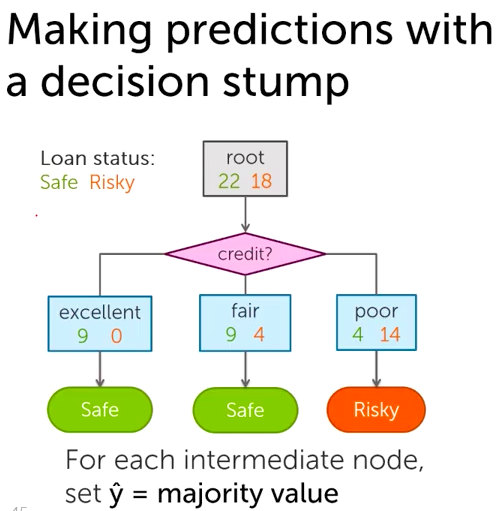

In [2]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/decision-stump.png')

    What is the best feature to split on? 
    This is the feature that gives the lowest classification error.
    
    classification error = # false predictors / # data points
    
    Given a subset of data M (a subnode in a tree):
        - For each feature Xi:
            - Split data of M according to feature Xi
            - Compute the classification error for each decision stump
        - Choose feature with lowest classification error  
        
    When to stop recursing?
        - When all the data have the same Y value
        - When all the features are splitted

    For continues variables split the values of a feature based on a threshold split
    (smaller than x, larger than x). See partitions above.
    
    How do you find the best threshold split?
    
    1. Sort the values of a feature Xi:
        Let {v1, v2, v3, vN} denote sorted values
    2. For i = 1 - N-1:
        - Consider split ti = (vi + vi+1) / 2
        - Compute classification error for threshold split Xi >= ti
    Chose the t* with the lowest classification error

This decision tree will predict whether a loan provided by the LendingClub is likely to default.

In [13]:
import graphlab
graphlab.canvas.set_target('ipynb')
import pandas as pd
import numpy as np
import sklearn
import sklearn.tree as tree

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1480462945.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1480462945.log


This non-commercial license of GraphLab Create for academic use is assigned to annaliakruseman@gmail.com and will expire on August 25, 2017.


In [14]:
# sframe
loans = graphlab.SFrame('/Users/annalie/Dev/data-science-from-scratch/data/lending-club-data.gl/')
# pandas
# loans = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/lending-club-data.csv')

In [3]:
loans.head()

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1
1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4
1072053,1288686,3000,3000,3000,36 months,18.64,109.43,E,E1
1071795,1306957,5600,5600,5600,60 months,21.28,152.39,F,F2
1071570,1306721,5375,5375,5350,60 months,12.69,121.45,B,B5
1070078,1305201,6500,6500,6500,60 months,14.65,153.45,C,C3
1069908,1305008,12000,12000,12000,36 months,12.69,402.54,B,B5


In [5]:
loans.column_names()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'is_inc_v',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'not_compliant',
 'status',
 'inactive_loans',
 'bad_loans',
 'emp_length_num',
 'grade_num',
 'sub_grade_num',
 'delinq_2yrs_zero',
 'pub_rec

In [6]:
# look at the distribution of loan grades
loans['grade'].show()

In [7]:
loans['home_ownership'].show()

In [15]:
# safe loan = 1
# risky loan = -1
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.remove_column('bad_loans')

In [10]:
print 'loans total: ', len(loans)
print 'safe loans: ', len(loans[loans["safe_loans"] == 1])
print 'risky loans: ', len(loans[loans["safe_loans"] == -1])

loans total:  122607
safe loans:  99457
risky loans:  23150


In [11]:
# explore the distribution of the columns 'safe loans'
loans['safe_loans'].show(view = 'Categorical')

In [12]:
# select features for the classification algorithm
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                   # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

In [13]:
# sample data to balance classes
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]
print "Number of safe loans: ", len(safe_loans_raw)
print "Number of risky loans: ", len(risky_loans_raw)

Number of safe loans:  99457
Number of risky loans:  23150


In [14]:
from __future__ import division
print "Percentage of safe loans: ", (len(safe_loans_raw) / (len(safe_loans_raw) + len(risky_loans_raw))) * 100
print "Percentage of risky loan: ", (len(risky_loans_raw) / (len(safe_loans_raw) + len(risky_loans_raw))) * 100

Percentage of safe loans:  81.1185331996
Percentage of risky loan:  18.8814668004


In [15]:
# Since there are fewer risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))

risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(percentage, seed=1)

# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

In [33]:
# verify that the data set is balanced
print "Percentage of safe loans: ", len(safe_loans) / float(len(loans_data))
print "Percentage of risky loans: ", len(risky_loans) / float(len(loans_data))
print "Total number of loans in our new dataset: ", len(loans_data)

Percentage of safe loans:  0.502236174422
Percentage of risky loans:  0.497763825578
Total number of loans in our new dataset:  46508


In [17]:
# convert categorical values to numeric values with one-hot-encoding
# sframe does this automatically

categorical_variables = []
for feat_name, feat_type in zip(loans_data.column_names(), loans_data.column_types()):
    if feat_type == str:
        categorical_variables.append(feat_name)

for feature in categorical_variables:
    loans_data_one_hot_encoded = loans_data[feature].apply(lambda x: {x: 1})
    loans_data_unpacked = loans_data_one_hot_encoded.unpack(column_name_prefix=feature)

    # Change None's to 0's
    for column in loans_data_unpacked.column_names():
        loans_data_unpacked[column] = loans_data_unpacked[column].fillna(0)

    loans_data.remove_column(feature)
    loans_data.add_columns(loans_data_unpacked)

In [70]:
# split data into training and validation set

# SFrame
train_data, test_data = loans_data.random_split(.8, seed = 1) 

# Pandas
# train_idx = pd.read_json('/Users/annalie/Dev/data-science-from-scratch/data/module-5-assignment-1-train-idx.json')[0].tolist()
# test_idx = pd.read_json('/Users/annalie/Dev/data-science-from-scratch/data/module-5-assignment-1-validation-idx.json')[0].tolist()
# train_data = loans.iloc[train_idx]
# test_data = loans.iloc[test_idx]

In [71]:
print '# train data: ', len(train_data)
print '# test data: ', len(test_data)

# train data:  37224
# test data:  9284


In [72]:
# create features list and target list
features = [x for x in train_data.column_names() if x != "safe_loans"]
train_features = train_data[features].to_numpy()
train_target = train_data['safe_loans'].to_numpy()

In [73]:
# build a decision tree classifier

# sframe
dt_model_sf = graphlab.decision_tree_classifier.create(train_data,
                                                       target = target, 
                                                       features = features)

# scikitlearn
dt_model = tree.DecisionTreeClassifier(max_depth = 6)
dt_model = dt_model.fit(train_features, train_target)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 35451

Number of classes           : 2

Number of feature columns   : 67

Number of unpacked features : 67

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.114434     | 0.640123          | 0.646362            | 0.663258          | 0.664710            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [74]:
# build a smaller model of the decision tree with a depth of 2

# sframe
# sframe
small_model_sf = graphlab.decision_tree_classifier.create(train_data,
                                                          target = target, 
                                                          features = features,
                                                          max_depth = 2)

# scikitlearn
small_model = tree.DecisionTreeClassifier(max_depth = 2)
small_model = small_model.fit(train_features, train_target)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 35394

Number of classes           : 2

Number of feature columns   : 67

Number of unpacked features : 67

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.051404     | 0.613296          | 0.617486            | 0.676197          | 0.675193            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [30]:
# visualize the decision tree model

# sframe
small_model_sf.show(view = "Tree")

In [66]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image   

dot_data = StringIO()  
tree.export_graphviz(small_model, out_file = dot_data, max_depth = 2, 
                     feature_names = features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

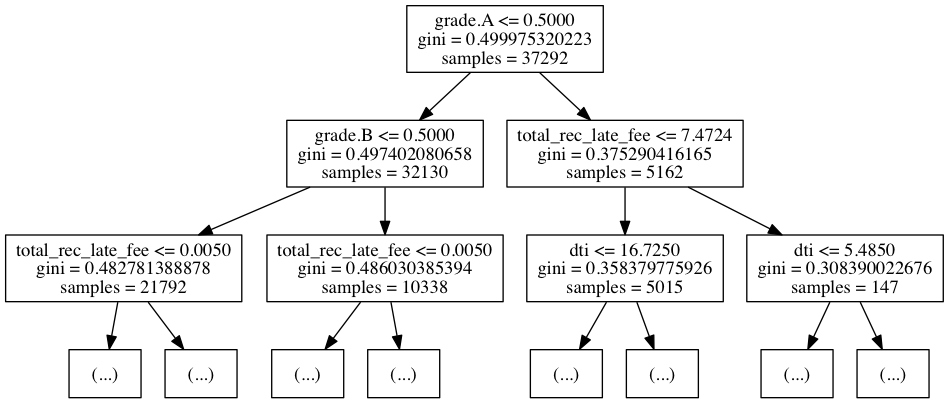

In [48]:
# show tree inline
Image(graph.create_png())

In [ ]:
# make predictions

In [75]:
# 1. create a sample test data set with only 4 observations (2 safe loans and 2 risky loans)
test_safe_loans = test_data[test_data[target] == 1]
test_risky_loans = test_data[test_data[target] == -1]

sample_test_data_safe = test_safe_loans[0:2]
sample_test_data_risky = test_risky_loans[0:2]

sample_test_data = sample_test_data_safe.append(sample_test_data_risky)
sample_test_data

Columns:
	short_emp	int
	emp_length_num	int
	dti	float
	last_delinq_none	int
	last_major_derog_none	int
	revol_util	float
	total_rec_late_fee	float
	safe_loans	int
	grade.A	int
	grade.B	int
	grade.C	int
	grade.D	int
	grade.E	int
	grade.F	int
	grade.G	int
	sub_grade.A1	int
	sub_grade.A2	int
	sub_grade.A3	int
	sub_grade.A4	int
	sub_grade.A5	int
	sub_grade.B1	int
	sub_grade.B2	int
	sub_grade.B3	int
	sub_grade.B4	int
	sub_grade.B5	int
	sub_grade.C1	int
	sub_grade.C2	int
	sub_grade.C3	int
	sub_grade.C4	int
	sub_grade.C5	int
	sub_grade.D1	int
	sub_grade.D2	int
	sub_grade.D3	int
	sub_grade.D4	int
	sub_grade.D5	int
	sub_grade.E1	int
	sub_grade.E2	int
	sub_grade.E3	int
	sub_grade.E4	int
	sub_grade.E5	int
	sub_grade.F1	int
	sub_grade.F2	int
	sub_grade.F3	int
	sub_grade.F4	int
	sub_grade.F5	int
	sub_grade.G1	int
	sub_grade.G2	int
	sub_grade.G3	int
	sub_grade.G4	int
	sub_grade.G5	int
	home_ownership.MORTGAGE	int
	home_ownership.OTHER	int
	home_ownership.OWN	int
	home_ownership.RENT	int
	purpose.car	int
	purpose.credit_card	int
	purpose.debt_consolidation	int
	purpose.home_improvement	int
	purpose.house	int
	purpose.major_purchase	int
	purpose.medical	int
	purpose.moving	int
	purpose.other	int
	purpose.small_business	int
	purpose.vacation	int
	purpose.wedding	int
	term. 36 months	int
	term. 60 months	int

Rows: 4

Data:
+-----------+----------------+-------+------------------+-----------------------+
| short_emp | emp_length_num |  dti  | last_delinq_none | last_major_derog_none |
+-----------+----------------+-------+------------------+-----------------------+
|     0     |       11       | 11.18 |        1         |           1           |
|     0     |       10       | 16.85 |        1         |           1           |
|     0     |       3        | 13.97 |        0         |           1           |
|     0     |       11       | 16.33 |        1         |           1           |
+-----------+----------------+-------+------------------+-----------------------+
+------------+--------------------+------------+---------+---------+---------+---------+
| revol_util | total_rec_late_fee | safe_loans | grade.A | grade.B | grade.C | grade.D |
+------------+--------------------+------------+---------+---------+---------+---------+
|    82.4    |        0.0         |     1      |    0    |    1    |    0    |    0    |
|    96.4    |        0.0         |     1      |    0    |    0    |    0    |    1    |
|    59.5    |        0.0         |     -1     |    0    |    0    |    0    |    1    |
|    62.1    |        0.0         |     -1     |    1    |    0    |    0    |    0    |
+------------+--------------------+------------+---------+---------+---------+---------+
+---------+---------+---------+--------------+--------------+--------------+--------------+
| grade.E | grade.F | grade.G | sub_grade.A1 | sub_grade.A2 | sub_grade.A3 | sub_grade.A4 |
+---------+---------+---------+--------------+--------------+--------------+--------------+
|    0    |    0    |    0    |      0       |      0       |      0       |      0       |
|    0    |    0    |    0    |      0       |      0       |      0       |      0       |
|    0    |    0    |    0    |      0       |      0       |      0       |      0       |
|    0    |    0    |    0    |      0       |      0       |      0       |      0       |
+---------+---------+---------+--------------+--------------+--------------+--------------+
+--------------+-----+
| sub_grade.A5 | ... |
+--------------+-----+
|      0       | ... |
|      0       | ... |
|      0       | ... |
|      1       | ... |
+--------------+-----+
[4 rows x 68 columns]

In [76]:
# predict labels
dt_model.predict(sample_test_data[features].to_numpy())

array([ 1, -1, -1,  1])

In [77]:
# predict probability
dt_model.predict_proba(sample_test_data[features].to_numpy())

array([[ 0.34156543,  0.65843457],
       [ 0.53630646,  0.46369354],
       [ 0.64750958,  0.35249042],
       [ 0.20789474,  0.79210526]])

In [80]:
# visualize the prediction on a tree
sample_test_data[1]

{'dti': 16.85,
 'emp_length_num': 10,
 'grade.A': 0,
 'grade.B': 0,
 'grade.C': 0,
 'grade.D': 1,
 'grade.E': 0,
 'grade.F': 0,
 'grade.G': 0,
 'home_ownership.MORTGAGE': 0,
 'home_ownership.OTHER': 0,
 'home_ownership.OWN': 0,
 'home_ownership.RENT': 1,
 'last_delinq_none': 1,
 'last_major_derog_none': 1,
 'purpose.car': 0,
 'purpose.credit_card': 0,
 'purpose.debt_consolidation': 1,
 'purpose.home_improvement': 0,
 'purpose.house': 0,
 'purpose.major_purchase': 0,
 'purpose.medical': 0,
 'purpose.moving': 0,
 'purpose.other': 0,
 'purpose.small_business': 0,
 'purpose.vacation': 0,
 'purpose.wedding': 0,
 'revol_util': 96.4,
 'safe_loans': 1,
 'short_emp': 0,
 'sub_grade.A1': 0,
 'sub_grade.A2': 0,
 'sub_grade.A3': 0,
 'sub_grade.A4': 0,
 'sub_grade.A5': 0,
 'sub_grade.B1': 0,
 'sub_grade.B2': 0,
 'sub_grade.B3': 0,
 'sub_grade.B4': 0,
 'sub_grade.B5': 0,
 'sub_grade.C1': 0,
 'sub_grade.C2': 0,
 'sub_grade.C3': 0,
 'sub_grade.C4': 0,
 'sub_grade.C5': 0,
 'sub_grade.D1': 1,
 'sub_grad

In [82]:
small_model_sf.show(view="Tree")

In [84]:
# evaluate the accuracy

# evaluate the accuracy on the training data
# sframe
print 'accuracy: ', dt_model_sf.evaluate(train_data)['accuracy']
print 'accuracy small model: ', small_model_sf.evaluate(train_data)['accuracy']

accuracy:  0.640420159037
accuracy small model:  0.613502041694


In [87]:
# evaluate the accuracy on the test data

# scikit learn
def getAccuracy(model, data):
    predictions = model.predict(data[features].to_numpy())
    actuals = data[target].to_numpy()
    diff = predictions - actuals
    return len(diff[diff == 0]) / len(diff)
print 'accuracy on train data: ', getAccuracy(dt_model, train_data)   
print 'accuracy on test data: ', getAccuracy(dt_model, test_data)

accuracy on train data:  0.640527616591
accuracy on test data:  0.636148211978


In [88]:
# compare the accuracy with a very big model, with depth = 10

# sframe
big_model_sf = graphlab.decision_tree_classifier.create(train_data,
                                                     target = target, 
                                                     features = features, 
                                                     max_depth = 10)

big_model = tree.DecisionTreeClassifier(max_depth = 10)
big_model = big_model.fit(train_features, train_target)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 35367

Number of classes           : 2

Number of feature columns   : 67

Number of unpacked features : 67

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.199976     | 0.664970          | 0.639203            | 0.652630          | 0.662964            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [91]:
# sframe
print 'accuracy on train data, sframe: ', big_model_sf.evaluate(train_data)['accuracy']
print 'accuracy on train data, sframe: ', big_model_sf.evaluate(test_data)['accuracy']

print '---'
# scikit learn
print 'accuracy on train data: ', getAccuracy(big_model, train_data)
print 'accuracy on train data: ', getAccuracy(big_model, test_data)

accuracy on train data, sframe:  0.663630990759
accuracy on train data, sframe:  0.627208099957
---
accuracy on train data:  0.663845905867
accuracy on train data:  0.626130978027


# Implementing binary decision tree

- Use SFrames to do some feature engineering.
- Transform categorical variables into binary variables.
- Write a function to compute the number of misclassified examples in an intermediate node.
- Write a function to find the best feature to split on.
- Build a binary decision tree from scratch.
- Make predictions using the decision tree.
- Evaluate the accuracy of the decision tree.
- Visualize the decision at the root node.

In [95]:
# load data set

# sframe
loans = graphlab.SFrame('/Users/annalie/Dev/data-science-from-scratch/data/lending-club-data.gl/')

# pandas
# loans = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/lending-club-data.csv')

In [97]:
# create new column for safe/risky loan

# safe loan = 1
# risky loan = -1
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.remove_column('bad_loans')

In [98]:
# select the features to use for the prediction
features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home_ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
target = 'safe_loans'
loans = loans[features + [target]]

In [105]:
# sample data to balance classes

safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Since there are less risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(percentage, seed = 1)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print "Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data))
print "Percentage of risky loans                :", len(risky_loans) / float(len(loans_data))
print "Total number of loans in our new dataset :", len(loans_data)

Percentage of safe loans                 : 0.502236174422
Percentage of risky loans                : 0.497763825578
Total number of loans in our new dataset : 46508


In [108]:
# transform categorical data into binary features
# some variables have three categories, so create dummie variables for the categories

for feature in features:
    loans_data_one_hot_encoded = loans_data[feature].apply(lambda x: {x: 1})    
    loans_data_unpacked = loans_data_one_hot_encoded.unpack(column_name_prefix = feature)
    
    # Change None's to 0's
    for column in loans_data_unpacked.column_names():
        loans_data_unpacked[column] = loans_data_unpacked[column].fillna(0)

    loans_data.remove_column(feature)
    loans_data.add_columns(loans_data_unpacked)

In [111]:
# show the list of columns in the new data set
features = loans_data.column_names()
features.remove('safe_loans')  # Remove the response variable

print "Number of features (after binarizing categorical variables) = %s" % len(features)
features

Number of features (after binarizing categorical variables) = 25


['grade.A',
 'grade.B',
 'grade.C',
 'grade.D',
 'grade.E',
 'grade.F',
 'grade.G',
 'term. 36 months',
 'term. 60 months',
 'home_ownership.MORTGAGE',
 'home_ownership.OTHER',
 'home_ownership.OWN',
 'home_ownership.RENT',
 'emp_length.1 year',
 'emp_length.10+ years',
 'emp_length.2 years',
 'emp_length.3 years',
 'emp_length.4 years',
 'emp_length.5 years',
 'emp_length.6 years',
 'emp_length.7 years',
 'emp_length.8 years',
 'emp_length.9 years',
 'emp_length.< 1 year',
 'emp_length.n/a']

In [114]:
# split the data in a training and test set
train_data, test_data = loans_data.random_split(.8, seed=1)

# Build decision tree model from scratch

Determine which feature to split on.

    Calculate the number of missclassified examples for a node that is assigned the majority class.

- Calculate the number of safe loans and risky loans.
- Since we are assuming majority class prediction, all the data points that are not in the majority class are considered mistakes.
- Return the number of mistakes.

In [115]:
# write a function which computes the number of misclassified examples of an intermediate node

def intermediate_node_num_mistakes(labels_in_node):
    # Corner case: If labels_in_node is empty, return 0
    if len(labels_in_node) == 0:
        return 0
    
    # Count the number of 1's (safe loans)
    sl_node = len(labels_in_node[labels_in_node == 1])
    
    # Count the number of -1's (risky loans)
    rl_node = len(labels_in_node[labels_in_node == -1])
        
    # find the largest class label
    majority = sl_node if sl_node > rl_node else rl_node
    
    # Return the number of mistakes that the majority classifier makes (= total - majority)
    return (sl_node + rl_node) - majority

        Pick best feature to split on. This is the feature with the smallest classification error.
        
        classification error = # of mistakes / # data points
        
- Loop over each feature in the feature list
- Within the loop, split the data into two groups: one group where all of the data has feature value 0 or False (we will call this the left split), and one group where all of the data has feature value 1 or True (we will call this the right split). Make sure the left split corresponds with 0 and the right split corresponds with 1 to ensure your implementation fits with our implementation of the tree building process.
- Calculate the number of misclassified examples in both groups of data and use the above formula to compute the classification error.
- If the computed error is smaller than the best error found so far, store this feature and its error.

In [117]:
def best_splitting_feature(data, features, target):
    
    best_feature = None # Keep track of the best feature 
    best_error = 10     # Keep track of the best error so far 
    # Note: Since error is always <= 1, we should intialize it with something larger than 1.

    # Convert to float to make sure error gets computed correctly.
    num_data_points = float(len(data))  
    
    # Loop through each feature to consider splitting on that feature
    for feature in features:
        
        # The left split will have all data points where the feature value is 0
        left_split = data[data[feature] == 0]
        
        # The right split will have all data points where the feature value is 1
        right_split = data[data[feature] == 1]
            
        # Calculate the number of misclassified examples in the left split.
        left_mistakes = intermediate_node_num_mistakes(left_split[target])            

        # Calculate the number of misclassified examples in the right split.
        right_mistakes = intermediate_node_num_mistakes(right_split[target])  
            
        # Compute the classification error of this split.
        # Error = (# of mistakes (left) + # of mistakes (right)) / (# of data points)
        error = (left_mistakes + right_mistakes) / num_data_points

        # If this is the best error we have found so far, store the feature as best_feature and the error as best_error
        if error < best_error:
            best_error = error
            best_feature = feature
    
    return best_feature # Return the best feature we found

In [119]:
# create a leave node given a set of target values
def create_leaf(target_values):
    
    # Create a leaf node
    leaf = {'splitting_feature' : None,
            'left' : None,
            'right' : None,
            'is_leaf': True}   ## YOUR CODE HERE
    
    # Count the number of data points that are +1 and -1 in this node.
    num_ones = len(target_values[target_values == +1])
    num_minus_ones = len(target_values[target_values == -1])
    
    # For the leaf node, set the prediction to be the majority class.
    # Store the predicted class (1 or -1) in leaf['prediction']
    if num_ones > num_minus_ones:
        leaf['prediction'] = 1      
    else:
        leaf['prediction'] = -1        
        
    # Return the leaf node        
    return leaf 

    Learn the tree when to stop recursing.
    
    3 stopping conditions:
- All data points in a node are from the same class.
- No more features to split on.
- In addition to the above two stopping conditions covered in lecture, in this assignment we will also consider a stopping condition based on the max_depth of the tree. By not letting the tree grow too deep, we will save computational effort in the learning process.

In [120]:
def decision_tree_create(data, features, target, current_depth = 0, max_depth = 10):
    remaining_features = features[:] # Make a copy of the features.
    
    target_values = data[target]
    print "--------------------------------------------------------------------"
    print "Subtree, depth = %s (%s data points)." % (current_depth, len(target_values))
    

    # Stopping condition 1
    if intermediate_node_num_mistakes(data[target]) == 0:  
        print "Stopping condition 1 reached."     
        # If no mistakes at current node, make current node a leaf node
        return create_leaf(target_values)
    
    # Stopping condition 2 (check if there are remaining features to consider splitting on)
    if len(remaining_features) == 0:   
        print "Stopping condition 2 reached."    
        # If there are no remaining features to consider, make current node a leaf node
        return create_leaf(target_values)    
    
    # Additional stopping condition (limit tree depth)
    if current_depth >= max_depth:  
        print "Reached maximum depth. Stopping for now."
        # If the max tree depth has been reached, make current node a leaf node
        return create_leaf(target_values)

    # Find the best splitting feature (recall the function best_splitting_feature implemented above)
    splitting_feature = best_splitting_feature(data, features, target)
    
    # Split on the best feature that we found. 
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]      
    remaining_features.remove(splitting_feature)
    print "Split on feature %s. (%s, %s)" % (\
                      splitting_feature, len(left_split), len(right_split))
    
    # Create a leaf node if the split is "perfect"
    if len(left_split) == len(data):
        print "Creating leaf node."
        return create_leaf(left_split[target])
    if len(right_split) == len(data):
        print "Creating leaf node."
        return create_leaf(right_split[target])

        
    # Repeat (recurse) on left and right subtrees
    left_tree = decision_tree_create(left_split, remaining_features, target, current_depth + 1, max_depth)        
    right_tree = decision_tree_create(right_split, remaining_features, target, current_depth + 1, max_depth)

    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

In [121]:
# function to count the nodes in the tree
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

In [123]:
# build the tree
my_decision_tree = decision_tree_create(train_data, features, target, current_depth = 6)

--------------------------------------------------------------------
Subtree, depth = 6 (37224 data points).
Split on feature term. 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 7 (9223 data points).
Split on feature grade.A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 8 (9122 data points).
Split on feature grade.B. (8074, 1048)
--------------------------------------------------------------------
Subtree, depth = 9 (8074 data points).
Split on feature grade.C. (5884, 2190)
--------------------------------------------------------------------
Subtree, depth = 10 (5884 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 10 (2190 data points).
Reached maximum depth. Stopping for now.
--------------------------------------------------------------------
Subtree, depth = 9 (1048 data poin

In [124]:
# make predictions

def classify(tree, x, annotate = False):   
    # if the node is a leaf node.
    if tree['is_leaf']:
        if annotate: 
            print "At leaf, predicting %s" % tree['prediction']
        return tree['prediction'] 
    else:
        # split on feature.
        split_feature_value = x[tree['splitting_feature']]
        if annotate: 
            print "Split on %s = %s" % (tree['splitting_feature'], split_feature_value)
        if split_feature_value == 0:
            print "left split"
            return classify(tree['left'], x, annotate)
        else:
            print "right split"
            return classify(tree['right'], x, annotate)

In [125]:
test_data[0]

{'emp_length.1 year': 0,
 'emp_length.10+ years': 0,
 'emp_length.2 years': 1,
 'emp_length.3 years': 0,
 'emp_length.4 years': 0,
 'emp_length.5 years': 0,
 'emp_length.6 years': 0,
 'emp_length.7 years': 0,
 'emp_length.8 years': 0,
 'emp_length.9 years': 0,
 'emp_length.< 1 year': 0,
 'emp_length.n/a': 0,
 'grade.A': 0,
 'grade.B': 0,
 'grade.C': 0,
 'grade.D': 1,
 'grade.E': 0,
 'grade.F': 0,
 'grade.G': 0,
 'home_ownership.MORTGAGE': 0,
 'home_ownership.OTHER': 0,
 'home_ownership.OWN': 0,
 'home_ownership.RENT': 1,
 'safe_loans': -1,
 'term. 36 months': 0,
 'term. 60 months': 1}

In [126]:
print 'Predicted class: %s ' % classify(my_decision_tree, test_data[0])

left split
left split
left split
left split
Predicted class: -1 


In [127]:
# add annotations to the prediction to see what the prediction path was that lead to this predicted class
classify(my_decision_tree, test_data[0], annotate=True)

Split on term. 36 months = 0
left split
Split on grade.A = 0
left split
Split on grade.B = 0
left split
Split on grade.C = 0
left split
At leaf, predicting -1


-1

    Evaluate the decision tree by computing the classification error of the tree.
    
    classification error = # mistakes / # data points

In [162]:
def evaluate_classification_error(tree, data):
    # Apply the classify(tree, x) to each row in your data
    prediction = data.apply(lambda x: classify(tree, x))
    
    # Once you've made the predictions, calculate the classification error and return it
    mistakes = data["safe_loans"] - prediction
    return len(mistakes[mistakes != 0]) / (float)(len(mistakes))

In [131]:
# evaluate the classification error on the test set
# round to 2 decimal points
round(evaluate_classification_error(my_decision_tree, test_data), 2)

left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
right split
left split
left split
left split
right split
right split
right split
right split


0.39

    Printing out a decision stump

In [132]:
def print_stump(tree, name = 'root'):
    split_name = tree['splitting_feature'] # split_name is something like 'term. 36 months'
    if split_name is None:
        print "(leaf, label: %s)" % tree['prediction']
        return None
    split_feature, split_value = split_name.split('.')
    print '                       %s' % name
    print '         |---------------|----------------|'
    print '         |                                |'
    print '         |                                |'
    print '         |                                |'
    print '  [{0} == 0]               [{0} == 1]    '.format(split_name)
    print '         |                                |'
    print '         |                                |'
    print '         |                                |'
    print '    (%s)                         (%s)' \
        % (('leaf, label: ' + str(tree['left']['prediction']) if tree['left']['is_leaf'] else 'subtree'),
           ('leaf, label: ' + str(tree['right']['prediction']) if tree['right']['is_leaf'] else 'subtree'))

In [133]:
print_stump(my_decision_tree)

                       root
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [term. 36 months == 0]               [term. 36 months == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (subtree)


In [136]:
# explore the left tree node (term 36 months = 0)
print_stump(my_decision_tree['left'], my_decision_tree['splitting_feature'])

                       term. 36 months
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade.A == 0]               [grade.A == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (subtree)


In [137]:
# eplore the left tree node of the first left tree node (term 36 months = 0 and grade.A = 0)
print_stump(my_decision_tree['left']['left'], my_decision_tree['left']['splitting_feature'])

                       grade.A
         |---------------|----------------|
         |                                |
         |                                |
         |                                |
  [grade.B == 0]               [grade.B == 1]    
         |                                |
         |                                |
         |                                |
    (subtree)                         (subtree)


# Overfitting

- Early stopping
- Pruning

Early stopping, 3 conditions:
    
    1. Limit tree depth:
        Stop splitting after a certain depth

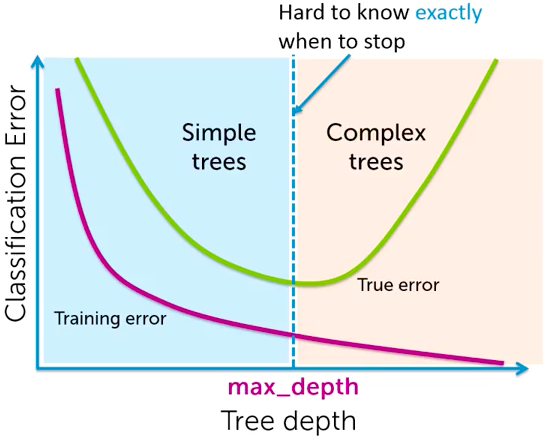

In [139]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/tree-depth.png')

    2. Classification error:
        Do not consider any split that does not cause a sufficient decrease in classification error

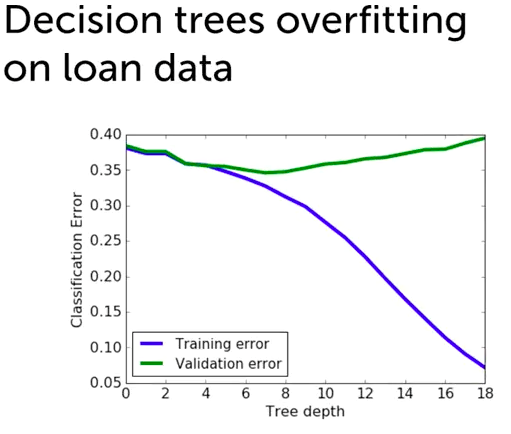

In [143]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/classification-error-depth-2.png')

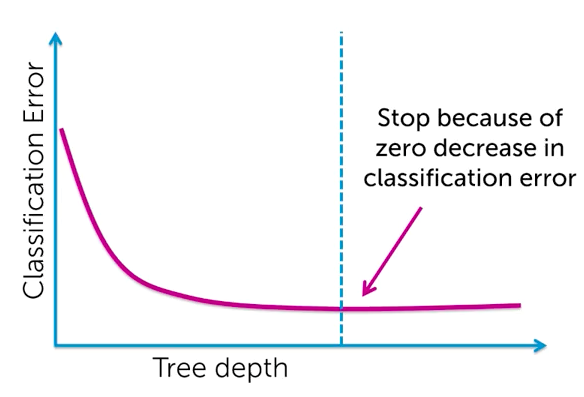

In [141]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/classification-error-depth.png')

    3. Minimum node "size":
        Do not split an intermediate node which contains too few data points

Pruning:
    
    Balance between classification error and number of leaf nodes, adding the tuning parameter lambda.
    
    Total cost = Error(T) error + lambda * L(T)

Exercise preventing overfitting:

- Implement binary decision trees with different early stopping methods.
- Compare models with different stopping parameters.
- Visualize the concept of overfitting in decision trees.

In [144]:
# use the same features as in the previous binary tree example

    Write functions for early stopping conditions 

In [146]:
# Choose the minimum node size

# The function reached_minimum_node_size takes 2 arguments:
    
# The data (from a node)
# The minimum number of data points that a node is allowed to split on, min_node_size

def reached_minimum_node_size(data, min_node_size):
    # Return True if the number of data points is less than or equal to the minimum node size
    return (len(data) <= min_node_size)

In [147]:
# minimum gain in classification error reduction

# The function error_reduction takes 2 arguments:

# The error before a split, error_before_split
# The error after a split, error_after_split

def error_reduction(error_before_split, error_after_split):
    # Return the error before the split minus the error after the split
    return (error_before_split - error_after_split)

In [148]:
# reuse the function for that calculates the number of misclassified examples when predicting the majority class
    # intermediate_node_num_mistakes
    
# reuse the function that finds the best feature to split on given the data and a list of features to consider
    # best_splitting_feature

# reuse the function which creates a leaf node given a set of target values
    # create_leaf

In [149]:
def decision_tree_create(data, features, target, current_depth = 0, 
                         max_depth = 10, min_node_size=1, 
                         min_error_reduction=0.0):
    
    remaining_features = features[:] # Make a copy of the features.
    
    target_values = data[target]
    print "--------------------------------------------------------------------"
    print "Subtree, depth = %s (%s data points)." % (current_depth, len(target_values))
    
    
    # Stopping condition 1: All nodes are of the same type.
    if intermediate_node_num_mistakes(target_values) == 0:
        print "Stopping condition 1 reached. All data points have the same target value."                
        return create_leaf(target_values)
    
    # Stopping condition 2: No more features to split on.
    if remaining_features == []:
        print "Stopping condition 2 reached. No remaining features."                
        return create_leaf(target_values)    
    
    # Early stopping condition 1: Reached max depth limit.
    if current_depth >= max_depth:
        print "Early stopping condition 1 reached. Reached maximum depth."
        return create_leaf(target_values)
    
    # Early stopping condition 2: Reached the minimum node size.
    # If the number of data points is less than or equal to the minimum size, return a leaf.
    if reached_minimum_node_size(data, min_node_size):          
        print "Early stopping condition 2 reached. Reached minimum node size."
        return create_leaf(target_values)  
    
    # Find the best splitting feature
    splitting_feature = best_splitting_feature(data, features, target)
    
    # Split on the best feature that we found. 
    left_split = data[data[splitting_feature] == 0]
    right_split = data[data[splitting_feature] == 1]
    
    # Early stopping condition 3: Minimum error reduction
    # Calculate the error before splitting (number of misclassified examples 
    # divided by the total number of examples)
    error_before_split = intermediate_node_num_mistakes(target_values) / float(len(data))
    
    # Calculate the error after splitting (number of misclassified examples 
    # in both groups divided by the total number of examples)
    left_mistakes = intermediate_node_num_mistakes(left_split[target])   
    right_mistakes = intermediate_node_num_mistakes(right_split[target])
    error_after_split = (left_mistakes + right_mistakes) / float(len(data))
    
    # If the error reduction is LESS THAN OR EQUAL TO min_error_reduction, return a leaf.
    if error_reduction(error_before_split, error_after_split) <= min_error_reduction:       
        print "Early stopping condition 3 reached. Minimum error reduction."
        return create_leaf(target_values)   
    
    
    remaining_features.remove(splitting_feature)
    print "Split on feature %s. (%s, %s)" % (\
                      splitting_feature, len(left_split), len(right_split))
    
    
    # Repeat (recurse) on left and right subtrees
    left_tree = decision_tree_create(left_split, remaining_features, target, 
                                     current_depth + 1, max_depth, min_node_size, min_error_reduction)        
    
    right_tree = decision_tree_create(right_split, remaining_features, target, 
                                     current_depth + 1, max_depth, min_node_size, min_error_reduction) 
    
    
    return {'is_leaf'          : False, 
            'prediction'       : None,
            'splitting_feature': splitting_feature,
            'left'             : left_tree, 
            'right'            : right_tree}

In [151]:
# count the nodes in the tree
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

In [153]:
# build the decision tree

# original tree without the conditions was my_decision_tree

# tree with the conditions:
my_decision_tree_new = decision_tree_create(train_data, 
                                            features, 
                                            target, 
                                            max_depth = 6,
                                            min_node_size = 100,
                                            min_error_reduction=0.0)

--------------------------------------------------------------------
Subtree, depth = 0 (37224 data points).
Split on feature term. 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 1 (9223 data points).
Split on feature grade.A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 2 (9122 data points).
Early stopping condition 3 reached. Minimum error reduction.
--------------------------------------------------------------------
Subtree, depth = 2 (101 data points).
Split on feature emp_length.n/a. (96, 5)
--------------------------------------------------------------------
Subtree, depth = 3 (96 data points).
Early stopping condition 2 reached. Reached minimum node size.
--------------------------------------------------------------------
Subtree, depth = 3 (5 data points).
Early stopping condition 2 reached. Reached minimum node size.
-------------------------------------------

In [159]:
# make predictions for an observation in the test data
# reuse the classifier to make predictions
    # classify
    
print 'model with conditions:'
print 'Predicted class: %s ' % classify(my_decision_tree_new, test_data[0], annotate = True)

# compare with the model without the conditions
print '---'
print 'model without conditions:'
print 'Predicted class: %s ' % classify(my_decision_tree, test_data[0], annotate = True)

model with conditions:
Split on term. 36 months = 0
left split
Split on grade.A = 0
left split
At leaf, predicting -1
Predicted class: -1 
---
model without conditions:
Split on term. 36 months = 0
left split
Split on grade.A = 0
left split
Split on grade.B = 0
left split
Split on grade.C = 0
left split
At leaf, predicting -1
Predicted class: -1 


In [165]:
# evaluate and compare the models with conditions and without conditions
    # reuse the function for the evaluation (evaluate_classification_error)
    
print 'accuracy for model with conditions: ', evaluate_classification_error(my_decision_tree_new, test_data)
print '---'
print 'accuracy for model without conditions: ', evaluate_classification_error(my_decision_tree, test_data)

 accuracy for model with conditions:  left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
right split
right split
right split
right split
0.383670831538
---
accuracy for model without conditions:  left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
right split
left split
left split
left split
right split
right split
right split
right split
0.38873330461


In [166]:
# compare models with different max_depths

model_1 = decision_tree_create(train_data, features, target, max_depth = 2, 
                                min_node_size = 0, min_error_reduction=-1)
model_2 = decision_tree_create(train_data, features, target, max_depth = 6, 
                                min_node_size = 0, min_error_reduction=-1)
model_3 = decision_tree_create(train_data, features, target, max_depth = 14, 
                                min_node_size = 0, min_error_reduction=-1)

--------------------------------------------------------------------
Subtree, depth = 0 (37224 data points).
Split on feature term. 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 1 (9223 data points).
Split on feature grade.A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 2 (9122 data points).
Early stopping condition 1 reached. Reached maximum depth.
--------------------------------------------------------------------
Subtree, depth = 2 (101 data points).
Early stopping condition 1 reached. Reached maximum depth.
--------------------------------------------------------------------
Subtree, depth = 1 (28001 data points).
Split on feature grade.D. (23300, 4701)
--------------------------------------------------------------------
Subtree, depth = 2 (23300 data points).
Early stopping condition 1 reached. Reached maximum depth.
-----------------------------------------------

In [167]:
# compare the max_depth for the 3 models on the training versus test data

print "Training data, classification error (model 1): ", evaluate_classification_error(model_1, train_data)
print "Test data, classification error (model 1): ", evaluate_classification_error(model_1, test_data)
print '---'
print "Training data, classification error (model 2): ", evaluate_classification_error(model_2, train_data)
print "Test data, classification error (model 1): ", evaluate_classification_error(model_2, test_data)
print '---'
print "Training data, classification error (model 3): ", evaluate_classification_error(model_3, train_data)
print "Test data, classification error (model 1): ", evaluate_classification_error(model_3, test_data)

Training data, classification error (model 1):  left split
left split
left split
left split
left split
left split
right split
left split
right split
left split
right split
left split
right split
left split
right split
left split
right split
left split
right split
left split
0.400037610144
Test data, classification error (model 1):  left split
left split
right split
left split
left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
right split
left split
right split
right split
right split
right split
0.398104265403
---
Training data, classification error (model 2):  left split
left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
right split
left split
left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
right split
left split
left split
left

In [168]:
# measure the complexity of the tree
# complexity = # of nodes

# compute number of leaves
def count_leaves(tree):
    if tree['is_leaf']:
        return 1
    return count_leaves(tree['left']) + count_leaves(tree['right'])

# compute number of nodes
def count_nodes(tree):
    if tree['is_leaf']:
        return 1
    return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

In [172]:
print '# of nodes model 1: ', count_nodes(model_1)
print '# of nodes model 1: ', count_nodes(model_2)
print '# of nodes model 1: ', count_nodes(model_3)

# of nodes model 1:  7
# of nodes model 1:  81
# of nodes model 1:  681


In [173]:
# train 3 models with different values of the minimum reduction in the classification error
model_4 = decision_tree_create(train_data, features, 'safe_loans', max_depth = 6, 
                                min_node_size = 0, min_error_reduction=-1)
model_5 = decision_tree_create(train_data, features, 'safe_loans', max_depth = 6, 
                             min_node_size = 0, min_error_reduction=0)
model_6 = decision_tree_create(train_data, features, 'safe_loans', max_depth = 6, 
                                min_node_size = 0, min_error_reduction=5)

--------------------------------------------------------------------
Subtree, depth = 0 (37224 data points).
Split on feature term. 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 1 (9223 data points).
Split on feature grade.A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 2 (9122 data points).
Split on feature grade.B. (8074, 1048)
--------------------------------------------------------------------
Subtree, depth = 3 (8074 data points).
Split on feature grade.C. (5884, 2190)
--------------------------------------------------------------------
Subtree, depth = 4 (5884 data points).
Split on feature grade.D. (3826, 2058)
--------------------------------------------------------------------
Subtree, depth = 5 (3826 data points).
Split on feature grade.E. (1693, 2133)
--------------------------------------------------------------------
Subtree, depth = 6 (1693 data points).
E

In [175]:
# calculate the accuracy of each model on the test set
print "Test data, classification error (model 4):", evaluate_classification_error(model_4, test_data)
print "Test data, classification error (model 5):", evaluate_classification_error(model_5, test_data)
print "Test data, classification error (model 6):", evaluate_classification_error(model_6, test_data)

Test data, classification error (model 4): left split
left split
left split
left split
right split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
right split
left split
left split
left split
left split
left split
right split
right split
left split
left split
left split
left split
right split
right split
left split
left split
left split
left split
0.383778543731
Test data, classification error (model 5): left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left sp

In [177]:
# compute the number of leaves of each model
print '# of leaves model 4: ', count_leaves(model_4)
print '# of leaves model 5: ', count_leaves(model_5)
print '# of leaves model 6: ', count_leaves(model_6)

# of leaves model 4:  41
# of leaves model 5:  13
# of leaves model 6:  1


In [178]:
# explore the effect of minimum node size
model_7 = decision_tree_create(train_data, features, 'safe_loans', max_depth = 6, 
                               min_node_size = 0, min_error_reduction=-1)
model_8 = decision_tree_create(train_data, features, 'safe_loans', max_depth = 6, 
                               min_node_size = 2000, min_error_reduction=-1)
model_9 = decision_tree_create(train_data, features, 'safe_loans', max_depth = 6, 
                               min_node_size = 50000, min_error_reduction=-1)

--------------------------------------------------------------------
Subtree, depth = 0 (37224 data points).
Split on feature term. 36 months. (9223, 28001)
--------------------------------------------------------------------
Subtree, depth = 1 (9223 data points).
Split on feature grade.A. (9122, 101)
--------------------------------------------------------------------
Subtree, depth = 2 (9122 data points).
Split on feature grade.B. (8074, 1048)
--------------------------------------------------------------------
Subtree, depth = 3 (8074 data points).
Split on feature grade.C. (5884, 2190)
--------------------------------------------------------------------
Subtree, depth = 4 (5884 data points).
Split on feature grade.D. (3826, 2058)
--------------------------------------------------------------------
Subtree, depth = 5 (3826 data points).
Split on feature grade.E. (1693, 2133)
--------------------------------------------------------------------
Subtree, depth = 6 (1693 data points).
E

In [179]:
# evaluate the models on the test set
print "Test data, classification error (model 7):", evaluate_classification_error(model_7, test_data)
print "Test data, classification error (model 8):", evaluate_classification_error(model_8, test_data)
print "Test data, classification error (model 9):", evaluate_classification_error(model_9, test_data)

Test data, classification error (model 7): left split
left split
left split
left split
right split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
right split
left split
left split
left split
right split
left split
left split
left split
left split
left split
right split
right split
left split
left split
left split
left split
right split
right split
left split
left split
left split
left split
0.383778543731
Test data, classification error (model 8): left split
left split
left split
left split
right split
left split
right split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left split
left sp

In [181]:
# compute the number of leaves in each model
print '# of leaves model 7: ', count_leaves(model_7)
print '# of leaves model 8: ', count_leaves(model_8)
print '# of leaves model 9: ', count_leaves(model_9)

# of leaves model 7:  41
# of leaves model 8:  19
# of leaves model 9:  1


# Random Forest from scratch

    Random Forest is a technique that falls under a broader technique called ensemble learning.
    This technique combines several weak learners(typically high bias and low-variance models) in order to produce a stronger model, and balancing the trade off between bias errors and variance errors.
    As such, it combines the result of multiple classifiers modeled on different sub-samples of the same data set. 
    
    Random Forest is a bagging technique for decision trees that combines the result of multiple classifiers modeled on different subsamples of the same data set.
    Rather than looking at all the attributes, for each subsample a number of m attributes is specified such that at each node, m variables are selected at random; the value of m is held constant.
    Each tree is then grown to the largest extent possible. 
    New data is predicted by aggregating the predictions of the ntree trees.

In [23]:
def forest_classify(trees, input):
    votes = [classify(tree, input) for tree in trees]
    vote_counts = Counter(votes)
    return vote_counts.most_common(1)[0][0]
    
    # for each random subset of attributes the best split is chosen

    # if there's already few enough split candidates, look at all of them
    if len(split_candidate) <= self.num_split_candidates:
        sampled_split_candidates = split_candidates
    # otherwise pick a random sample
    else:
        sampled_split_candidates = random.sample(split_candidates,
                                                self.num_split_candidates)

    # now choose the best attribute only from those candidates 
    best_attribute = min(sampled_split_candidates,
                        key = partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)

# Boosting - Machine Learning course Classification

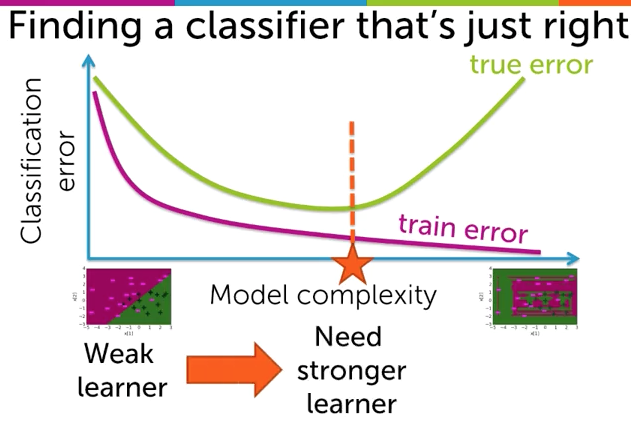

In [2]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/boosting-question.png')

    How?
    1. Add more features or depth
    2. Combine a set of weak classifiers to create a stronger classifier = Boosting
    
    Boosting is a type of ensemble methods.
    The idea behind ensemble methods is that multiple classifiers are weighted and combined to an overall ensemble model.

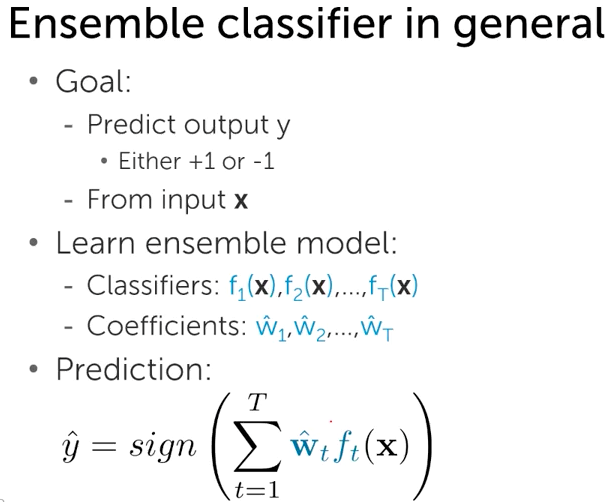

In [5]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/ensemble-classifier-model.png')

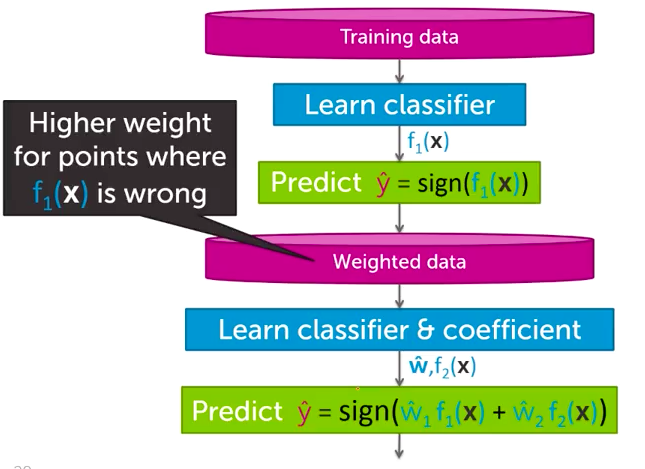

In [6]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/boosting-principle.png')

    AdaBoost is a type of boosting that starts with the same weight for all outputs.
    
    - Coefficients w are computed by how much trust you put on f(x)
    - The weights of a are recomputed for mistakes

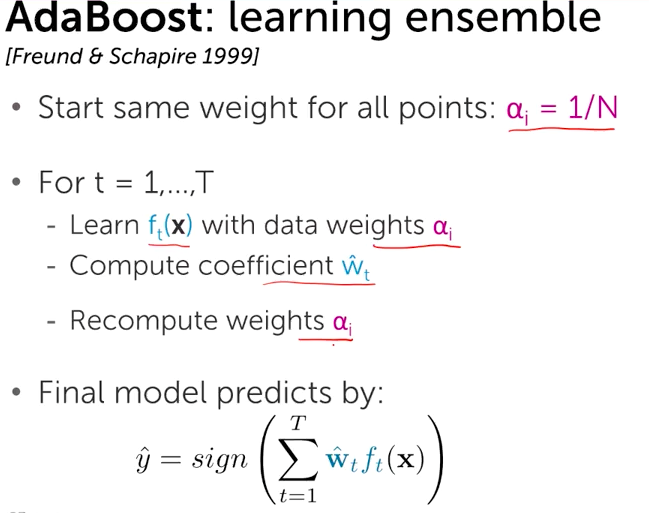

In [7]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/adaboost-model.png')

    Compute coefficient w of classifier f(x):
    
    - When f(x) is good -- larger weight on w
    - When f(x) is bad -- smaller weight on w
    
    Whether f(x) is good depends on whether f has a low training error.
    
    The weighted error measures the fraction of the weight of mistakes:
    
    weighted error = total weights of mistakes / total weight of all data points
    
    Best error is 0.0.

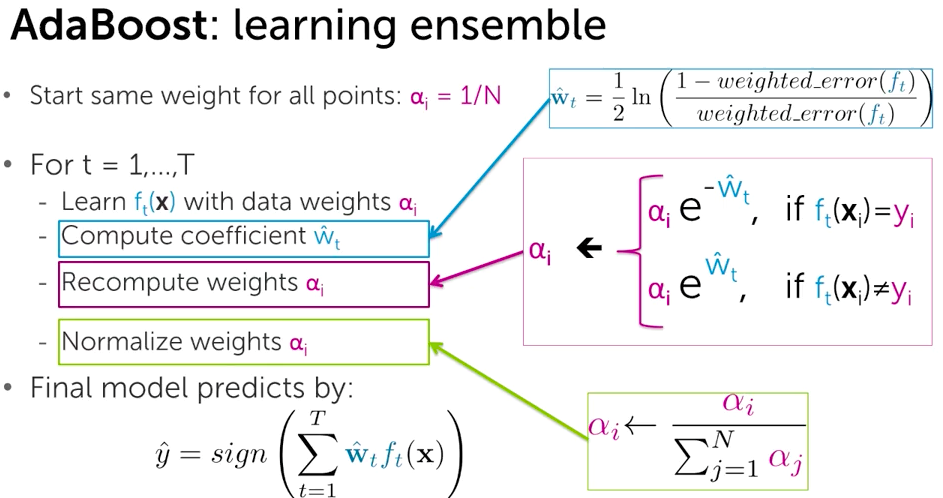

In [11]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/adaboost-formula.png')

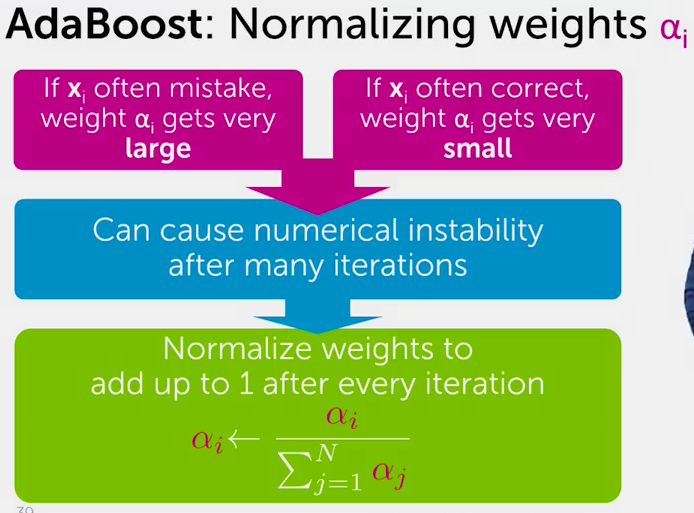

In [12]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/adaboost-normalizing.png')